# Skin segmentation problem
[Link here](http://archive.ics.uci.edu/ml/datasets/Skin+Segmentation)

In [1]:
import numpy as np

In [2]:
sample = 240000

In [3]:
data = np.loadtxt('Skin_NonSkin.txt')

In [4]:
num_rows, _ = data.shape

In [5]:
indx = np.random.choice(num_rows, size=sample, replace=False)

In [6]:
X, y = data[indx,:3], data[indx,3]
X, y = X/X.max(), y - 1

In [7]:
num_examples, num_features = X.shape

In [8]:
x0 = np.ones((num_examples,1))
X = np.hstack((x0,X))
y = y.reshape((num_examples,1))

In [9]:
def hypothesis(theta, X):
    '''
    Returns the hypothesis for the LogReg
    theta: (n+1, 1) vector [n: # features]
    X: (m, n+1) matrix [m: # examples]
    '''
    return 1./(1. + np.exp(-X.dot(theta)))

In [10]:
def cost_function(theta, X, y):
    '''
    Returns the cost for the given parameters
    theta: (n+1, 1) vector [n: # features]
    X: (m, n+1) matrix [m: # examples]
    y: (m, 1) vector
    '''
    m, _ = y.shape
    hyp = hypothesis(theta,X)
    class1, class0 = y.T.dot(np.log(hyp)), (1-y.T).dot(np.log(1-hyp))
    return (-class1-class0)/m

In [11]:
def gradient(theta, X, y):
    '''
    Returns the gradient descent to correct the given parameters
    '''
    m, _ = y.shape
    hyp = hypothesis(theta,X)
    return (X.T.dot(hyp-y))/m

In [12]:
def update_theta(theta, alpha, X, y):
    '''
    Returns the new theta
    '''
    return theta - alpha * gradient(theta,X,y)

### Training the model

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
theta = np.ones((num_features+1,1))

In [15]:
alpha = 0.1
num_iter = 500
costs = []
thetas = []

In [16]:
for _ in range(num_iter):
    costs.append(cost_function(theta, X_train, y_train)[0,0])
    theta = update_theta(theta, alpha, X_train, y_train)
    thetas.append(theta)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
plt.style.use('ggplot')

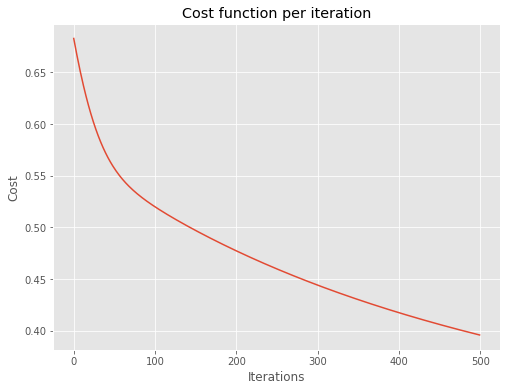

In [19]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(num_iter), costs)

ax.set_title('Cost function per iteration')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')

plt.show()

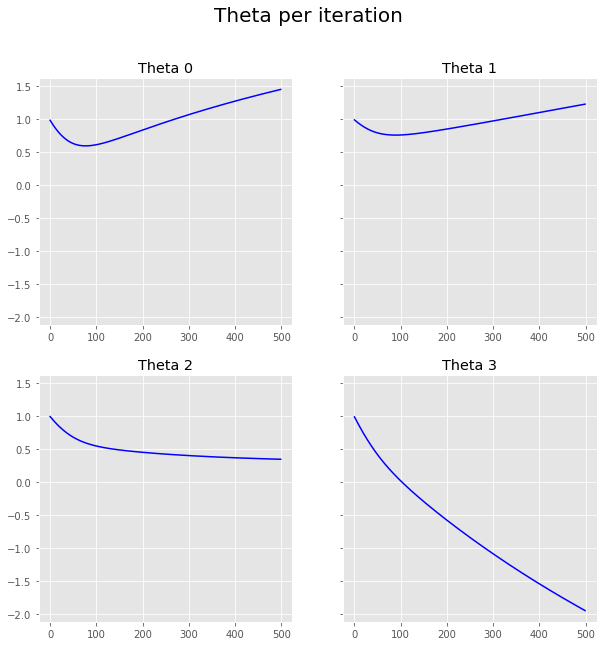

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(10,10))

fig.suptitle('Theta per iteration',fontsize=20)

for f in range(num_features+1):
    ts = [theta.flatten()[f] for theta in thetas]

    axis = np.binary_repr(f,width=2)
    i, j = int(axis[0]), int(axis[1])

    ax[i,j].plot(range(num_iter), ts, color='b')
    ax[i,j].set_title('Theta {0}'.format(f))

plt.show()

### Testing the model

In [21]:
predict = hypothesis(theta, X_test)

In [22]:
mse = predict.T.dot(predict)[0,0]

In [23]:
rmse = np.sqrt(mse/len(y_test))

In [24]:
rmse

0.7806378482782445